##                                             OIBSIP TASK # 3

 ##              DATA CLEANING ON NYC AIRBNB DATASET

# 1. DATA INTEGRITY

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [136]:
df=pd.read_csv("/home/ammar-ahmed-siddiqui/Downloads/drive-download-20240815T044351Z-001/AB_NYC_2019.csv")

In [137]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [138]:
# list the data types for each column
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [139]:
print("Size of the dataset: ", df.size)
print("Columns in the dataset: ", df.keys())

Size of the dataset:  782320
Columns in the dataset:  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [140]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 48895
Number of columns 16


In [141]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [142]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# The data have 5 major locations in dataset and only 3 room types available.

In [143]:
# see how many room types do we have
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [144]:
# see how many neighbourhood groups
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

# 2. MISSING DATA HANDLING

In [145]:
print("Is there any null or missing values ? ",df.isnull().sum().any())
print("percentage of null values in particular column",df.isnull().sum()/len(df)*1000)

Is there any null or missing values ?  True
percentage of null values in particular column id                                  0.000000
name                                0.327232
host_id                             0.000000
host_name                           0.429492
neighbourhood_group                 0.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                       205.583393
reviews_per_month                 205.583393
calculated_host_listings_count      0.000000
availability_365                    0.000000
dtype: float64


 1 
Drop all unnecessary columns (name,host_name, last_revie as 0

2 Change data types for neighbourhood_group,neighbourhood,room_type to categorical data 

 3 Fill all NA values in reviews_per_month as 0

 4 Drop all listings with price as 0

In [146]:
# create a copied dataframe for listing

NYC_BNB = df.copy()
NYC_BNB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# A. Drop all unnecessary columns (name,host_name, last_review)

In [147]:
# drop unwanted columns

NYC_BNB.drop('name',axis=1, inplace=True)
print("name column is droped now")

NYC_BNB.isna().sum()

name column is droped now


id                                    0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [148]:
NYC_BNB.drop('host_name',axis=1, inplace=True)
print("host_name column is droped now")

NYC_BNB.isna().sum()

host_name column is droped now


id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [149]:
NYC_BNB.drop('last_review',axis=1, inplace=True)
print("last_review column is droped now")

NYC_BNB.isna().sum()

last_review column is droped now


id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# B. Fill all NA values in reviews_per_month as 0

In [150]:
# fill NA values in reviews_per_month as 0
NYC_BNB['reviews_per_month'].fillna(0.0)
NYC_BNB.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# C. Drop all listings with price as 0

In [151]:
# drop all listings of price 0
NYC_BNB.drop(NYC_BNB[NYC_BNB['price'] == 0].index.values, axis = 0,inplace=True)

# D. Drop all listings with price as 0

In [152]:
zero_price_count = (NYC_BNB['price'] == 0).sum()

print(f"\nNumber of zero values in the 'price' column: {zero_price_count}")


Number of zero values in the 'price' column: 0


In [153]:
NYC_BNB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   host_id                         48884 non-null  int64  
 2   neighbourhood_group             48884 non-null  object 
 3   neighbourhood                   48884 non-null  object 
 4   latitude                        48884 non-null  float64
 5   longitude                       48884 non-null  float64
 6   room_type                       48884 non-null  object 
 7   price                           48884 non-null  int64  
 8   minimum_nights                  48884 non-null  int64  
 9   number_of_reviews               48884 non-null  int64  
 10  reviews_per_month               38833 non-null  float64
 11  calculated_host_listings_count  48884 non-null  int64  
 12  availability_365                48884

# Through the wrangling steps, we understand that we are dealing with a dataset around 50,000 observations and 13 columns. Now the cleaned dataset doesn't have missing values, and users' sensitive values have been removed.

# 3.DUPLICATE REMOVAL

In [154]:
print("Information of the dataset: \n",NYC_BNB.info())
print("After removing duplicates: \n",NYC_BNB.drop_duplicates(inplace=True)) #cleaning the data by checking the duplicates
print("Size of the dataset after removing duplicates: \n",NYC_BNB.size)

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   host_id                         48884 non-null  int64  
 2   neighbourhood_group             48884 non-null  object 
 3   neighbourhood                   48884 non-null  object 
 4   latitude                        48884 non-null  float64
 5   longitude                       48884 non-null  float64
 6   room_type                       48884 non-null  object 
 7   price                           48884 non-null  int64  
 8   minimum_nights                  48884 non-null  int64  
 9   number_of_reviews               48884 non-null  int64  
 10  reviews_per_month               38833 non-null  float64
 11  calculated_host_listings_count  48884 non-null  int64  
 12  availability_365                48884

After removing duplicates: 
 None
Size of the dataset after removing duplicates: 
 635492


# 4. STANDARDIZATION 

In [155]:
# numerical columns
numerical_data = NYC_BNB.select_dtypes(exclude = ['object']).columns
print("Numerical columns: ",numerical_data)
# categorical columns
categorical_data = NYC_BNB.select_dtypes(include = ['object']).columns
print("Categorical columns: ",categorical_data)

Numerical columns:  Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Categorical columns:  Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


In [156]:
# change data types for specified columns from 'object' to 'categorical'
NYC_BNB[['neighbourhood_group','neighbourhood','room_type']] = NYC_BNB[['neighbourhood_group','neighbourhood','room_type']].astype('category')


In [157]:
NYC_BNB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48884 non-null  int64   
 1   host_id                         48884 non-null  int64   
 2   neighbourhood_group             48884 non-null  category
 3   neighbourhood                   48884 non-null  category
 4   latitude                        48884 non-null  float64 
 5   longitude                       48884 non-null  float64 
 6   room_type                       48884 non-null  category
 7   price                           48884 non-null  int64   
 8   minimum_nights                  48884 non-null  int64   
 9   number_of_reviews               48884 non-null  int64   
 10  reviews_per_month               38833 non-null  float64 
 11  calculated_host_listings_count  48884 non-null  int64   
 12  availability_365       

# 5. OUTLIER DETECTION

In [158]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

#                                IDENTIFYING OUTLIERS USING Z-SCORE

In [159]:
import pandas as pd
import numpy as np

# Example function to detect outliers based on Z-score
def detect_outliers_zscore(df, column_name, threshold=3):
    if df is not None and column_name in df.columns:
        # Calculate Z-scores
        df['Z-Score'] = (df[column_name] - df[column_name].mean()) / df[column_name].std()
        
        # Identify outliers
        outliers = df[df['Z-Score'].abs() > threshold]
        return outliers
    else:
        print("DataFrame is None or column does not exist.")
        return None


# Call the function with the DataFrame and column name
outliers = detect_outliers_zscore(NYC_BNB, 'price')

# Check if outliers were found
if outliers is not None:
    print("Outliers FOUND \n:", outliers)
else:
    print("No outliers found or DataFrame issue.")


Outliers FOUND 
:              id    host_id neighbourhood_group       neighbourhood  latitude  \
496      174966     836168           Manhattan     Upper West Side  40.77350   
762      273190     605463           Manhattan        West Village  40.73301   
946      363673     256239           Manhattan     Upper West Side  40.80142   
1105     468613    2325861           Manhattan     Lower East Side  40.72152   
1414     634353     836168           Manhattan     Upper West Side  40.77428   
...         ...        ...                 ...                 ...       ...   
48301  36186719  268920555           Manhattan             Chelsea  40.74531   
48304  36189195  270214015           Manhattan      Hell's Kitchen  40.75533   
48305  36189257  272166348           Manhattan     Upper East Side  40.78132   
48523  36308562  217732163            Brooklyn  Bedford-Stuyvesant  40.68767   
48535  36311055  245712163            Brooklyn  Bedford-Stuyvesant  40.68245   

       longitude     

#                                              ADRESSING OUTLIERS 

In [160]:
import pandas as pd
import numpy as np

if NYC_BNB is not None and 'price' in NYC_BNB.columns:
    # Calculate Z-scores
    NYC_BNB['Z-Score'] = (NYC_BNB['price'] - NYC_BNB['price'].mean()) / NYC_BNB['price'].std()
    
    # Check if Z-Score column was created
    if 'Z-Score' in NYC_BNB.columns:
        # Remove outliers
        NYC_BNB_no_outliers = NYC_BNB[NYC_BNB['Z-Score'].abs() <= 3]
        print("NO OUTLIER LEFT \n",NYC_BNB_no_outliers.head())  # Display the first few rows without outliers
    else:
        print("'Z-Score' column is missing. Please calculate it first.")
else:
    print("DataFrame is None or 'price' column is missing.")


NO OUTLIER LEFT 
      id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365  

#                     NO OUTLIERS LEFT IN THE DATA SET

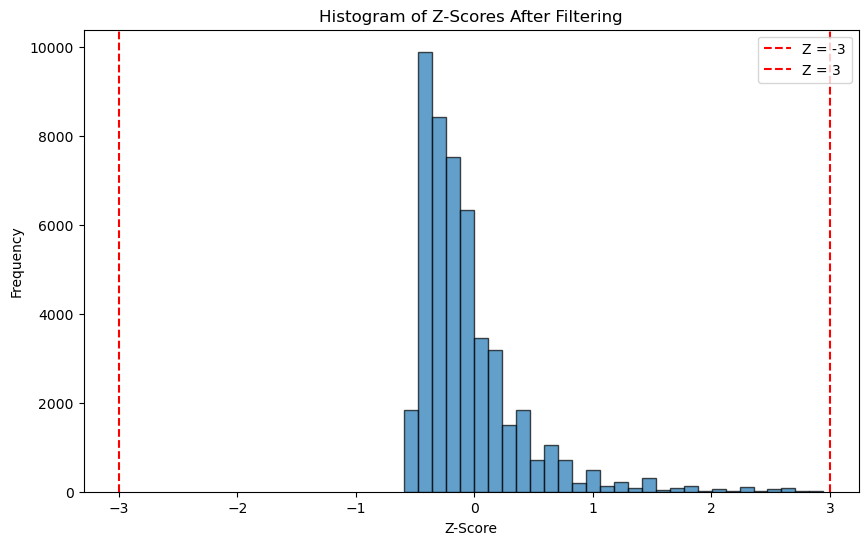

In [161]:
import matplotlib.pyplot as plt

# Plot histogram of Z-scores after filtering
plt.figure(figsize=(10, 6))
plt.hist(NYC_BNB_no_outliers['Z-Score'], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=-3, color='r', linestyle='--', label='Z = -3')
plt.axvline(x=3, color='r', linestyle='--', label='Z = 3')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Histogram of Z-Scores After Filtering')
plt.legend()
plt.show()


#                                                  INTERPRETATIOIN


Impact: Extreme values in price can skew results.
Address: Detect using Z-scores or box plots; handle by removing or transforming.

Impact: Missing data in columns like reviews_per_month affects model accuracy.
Address: Impute with mean/median or use advanced methods; consider adding an indicator for missingness.

Impact: High correlation between features like price and number_of_reviews can affect model stability.
Address: Use correlation matrices or VIF to detect; remove or combine features, or use PCA.

Impact: External or future information can lead to unrealistic performance metrics.
Address: Properly split data into training and testing sets; avoid features that might include future information.

Impact: Imbalance in features like room_type can bias models.
Address: Use resampling techniques (e.g., SMOTE) or algorithms that handle imbalanced data.

Impact: Assumptions like linearity may not fit all features.
Address: Test assumptions; use models that don’t rely on strict assumptions.

Impact: Model may perform well on training data but poorly on new data.
Address: Use cross-validation; apply regularization methods.

Impact: Too-simple models may not capture important patterns.
Address: Increase model complexity; improve feature engineering.

Impact: Different scales can affect model performance.
Address: Normalize or standardize features as needed.

Impact: Errors in features like price can reduce accuracy.
Address: Clean data and use robust models.

Investigate and address outliers in price.
Impute missing reviews_per_month.
Check and resolve multicollinearity between number_of_reviews and reviews_per_month.
Handle class imbalance in room_type.
Validate and regularize models to avoid overfitting and underfitting.
Addressing these factors will enhance the accuracy and reliability of your analysis and models.

# data has no outlier

In [162]:
NYC_BNB_no_outliers=df.to_csv("/home/ammar-ahmed-siddiqui/Downloads/drive-download-20240815T044351Z-001/AB_NYC_submission.csv")

# AUTHOR

FARYAL SHAKEEL
BS-COMPUTER SCIENCE

OASIS-INFOBYTES DATA ANALYTICS INTERNSHIP
TASK NEWYORK AIRBNB DATA WRANGLING/CLEANING